#                                      Data Science Intern at LetsGrowMore

###       Task     :      2)Next Word Prediction
###        Level   :      ADVANCED LEVEL TASK
###        Batch  :      August 2k22
###        Author:      Akash Dandge

In [1]:
#import required libraries
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)
import warnings as wg
wg.filterwarnings("ignore") 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Reading File

In [2]:
text = open( r'S:\Projects\LGMVIP- DataScience\2.Next Word Prediction\1661-0.txt',encoding='charmap').read().lower()
print('corpus length:', len(text))

corpus length: 595481


### Feature Engineering

In [4]:
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 79


In [5]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 198481


In [6]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]

't'

In [7]:
print(X[0][0])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True]


In [8]:
X.shape

(198481, 40, 79)

In [9]:
y.shape

(198481, 79)

### Building the Recurrent Neural network

In [10]:
model = Sequential()
model.add(LSTM(500, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 500)               1160000   
                                                                 
 dense (Dense)               (None, 79)                39579     
                                                                 
 activation (Activation)     (None, 79)                0         
                                                                 
Total params: 1,199,579
Trainable params: 1,199,579
Non-trainable params: 0
_________________________________________________________________


### Training the Next Word Prediction Model

In [12]:
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=10, 
                    shuffle=True).history

Epoch 1/10
1536/1536 [==============================] - 2358s 2s/step - loss: 1.9069 - accuracy: 0.4467 - val_loss: 2.0639 - val_accuracy: 0.4363
Epoch 2/10
1536/1536 [==============================] - 1403s 913ms/step - loss: 1.4783 - accuracy: 0.5554 - val_loss: 1.9627 - val_accuracy: 0.4786
Epoch 3/10
1536/1536 [==============================] - 1575s 1s/step - loss: 1.3608 - accuracy: 0.5876 - val_loss: 2.0066 - val_accuracy: 0.4887
Epoch 4/10
1536/1536 [==============================] - 7968s 5s/step - loss: 1.3014 - accuracy: 0.6039 - val_loss: 1.9234 - val_accuracy: 0.4831
Epoch 5/10
1536/1536 [==============================] - 3758s 2s/step - loss: 1.2569 - accuracy: 0.6155 - val_loss: 1.9735 - val_accuracy: 0.4932
Epoch 6/10
1536/1536 [==============================] - 1879s 1s/step - loss: 1.2120 - accuracy: 0.6262 - val_loss: 2.0909 - val_accuracy: 0.4826
Epoch 7/10
1536/1536 [==============================] - 1682s 1s/step - loss: 1.1906 - accuracy: 0.6327 - val_loss: 1.990

### Saving the modal

In [13]:
model.save('next_word_prediction_model.h5')
pickle.dump(history, open("history.p", "wb"))
model = load_model('next_word_prediction_model.h5')
history = pickle.load(open("history.p", "rb"))

### Evaluating the Next Word Prediction Model

In [14]:
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6203/6203 [==============================] - 1214s 195ms/step - loss: 1.2293 - accuracy: 0.6204
Test Loss 1.2292520999908447
Test Accuracy 0.6203515529632568


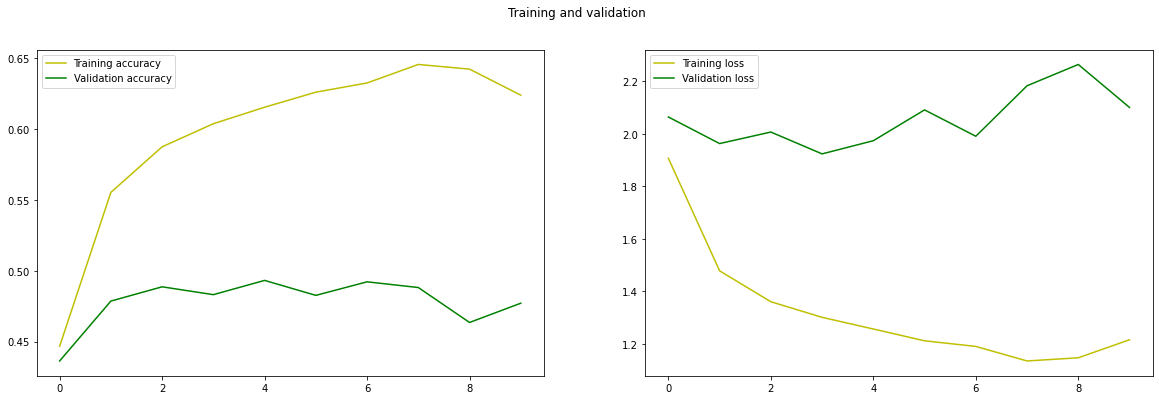

In [15]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

### Testing Next Word Prediction Model

In [16]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

In [17]:
prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

### Predict

In [23]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [24]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [25]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [26]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [27]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

it is not a lack of love, but a lack of 
['the ', 'a ', 'his ', 'some ', 'into ']

that which does not kill us makes us str
['ain ', 'onist ', 'eet ', 'uck ', 'ident ']

i'm not upset that you lied to me, i'm u
['pon ', 'ntil ', 'siary ', 'r\nand ', 'cament ']

and those who were seen dancing were tho
['usable ', 'se ', 're ', 't ', 'd. ']

it is hard enough to remember my opinion
['. ', ' that ', ', ', '\nof ', '?â\x80\x9d\n\nâ\x80\x9ci ']

